### Simple Linear Regression

<ul>
    <li>Is a statistical process for estimating the relationship between an independent variable and a continous variable. (i.e. Slope of the line will tell you that 2 variables are positively or negatively correlated.)</li>
    <li>Simple linear regression only involves one dependent and one independent variable</li>
    <li>Calculate b0 by subbing in mean(y) = b0 + b1(mean(x))</li>
</ul>

<div>
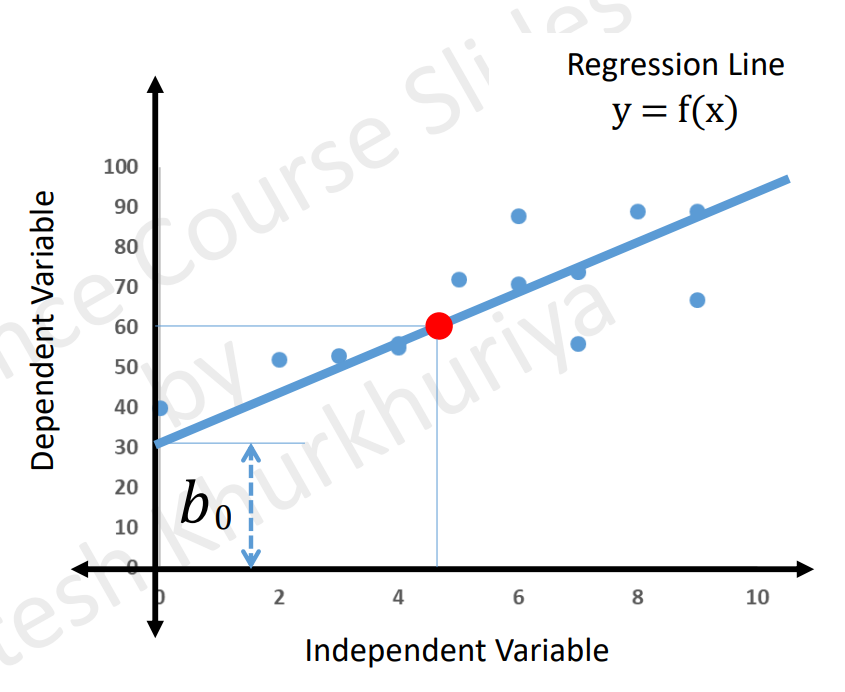
</div>

<div>
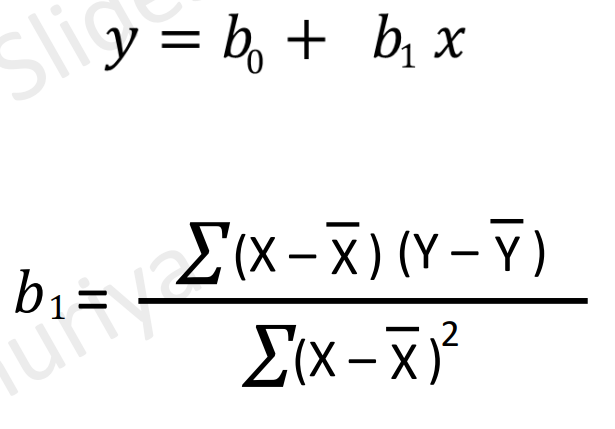
</div>


<b> Ordinary Least Square </b>
<ul>
    <li>(Actual y value - Predicted y value)*2</li>
    <li> We square to avoid cancelling positive and negative errors </li>
    <li>We use this when prediction values are small, because MSE will try to balance large errors caused by outliers. This error metric severely punishes outliers.</li>
</ul>

<b> Mean Absolute Error </b>
<ul>
    <li>Average Sum of modulus of errors</li>
    <li>We use MAE when we do not want our model to learn about the outliers.</li>
</ul>

<b> RMSE </b>
<ul>
    <li>Root of the Ordinary Least Squares error</li>
    <li>Very commonly used and used as a general purpose error metric for numerical predictions</li>
    <li>Good balance between MAE and MSE</li>
</ul>


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./data/01Students.csv")
df.dtypes, df.describe(), display(df.head()), df.isnull().sum()

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42


(Hours    int64
 Marks    int64
 dtype: object,
            Hours      Marks
 count  30.000000  30.000000
 mean    5.200000  61.400000
 std     3.188341  17.734828
 min     0.000000  33.000000
 25%     3.000000  45.250000
 50%     5.000000  60.000000
 75%     7.750000  77.000000
 max    11.000000  89.000000,
 None,
 Hours    0
 Marks    0
 dtype: int64)

In [3]:
x = df.iloc[:,0]
y = df.iloc[:,1]

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3, random_state=1234)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [5]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21, 1), (9, 1), (21, 1), (9, 1))

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [7]:
pred = model.predict(x_test)
pred

array([[49.35373808],
       [49.35373808],
       [39.29954842],
       [39.29954842],
       [84.54340191],
       [49.35373808],
       [39.29954842],
       [74.48921224],
       [59.40792775]])

### Evaluating Linear Regression

<b>R-Squared: Coefficient of Determination: Explains how much variation in Y is explained by the variation in X</b><br> R-Squared = SSR/SST - Higher value of R-Squared = Variation in Y is explainable by variation in X <br>

SST (Sum of Squares Total) - Sum of squares of difference between actual values and actual y mean -> <b>How much the y values deviate from the y mean.</b>
<br>

SSR = (Sum of squares due to regression) - Sum of squares of difference between predicted values and actual y mean -> <b>How much the predicted y values deviate from the y-mean</b>
<br>

If predicted value is close to actual value, SSR will be close to SST. R-Squared close to 1.
<br>

<div>
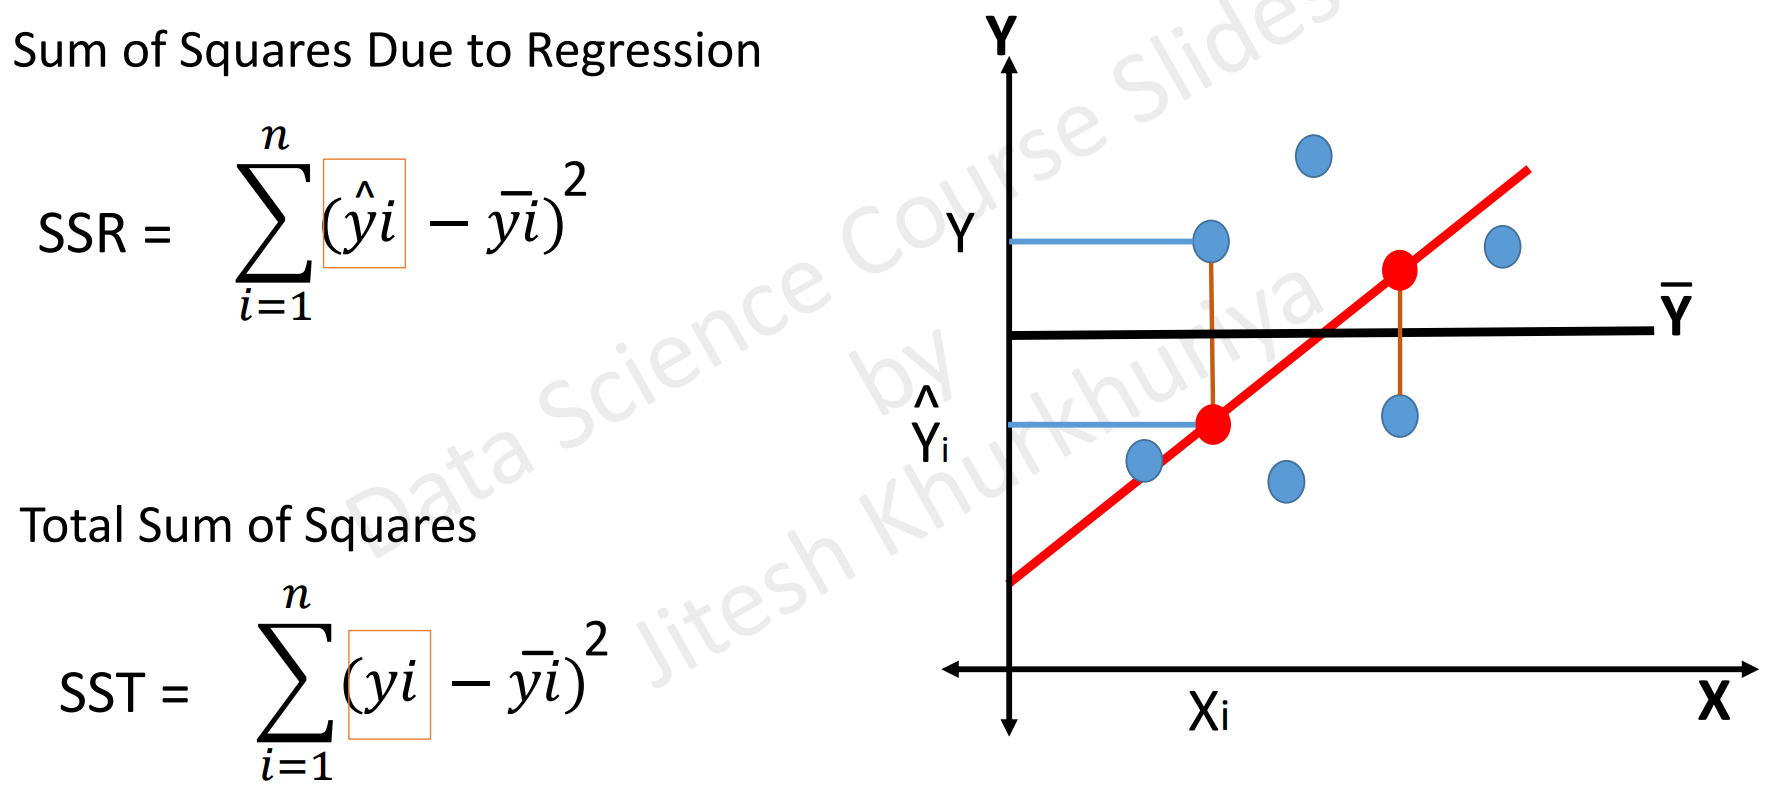
</div>

<div>
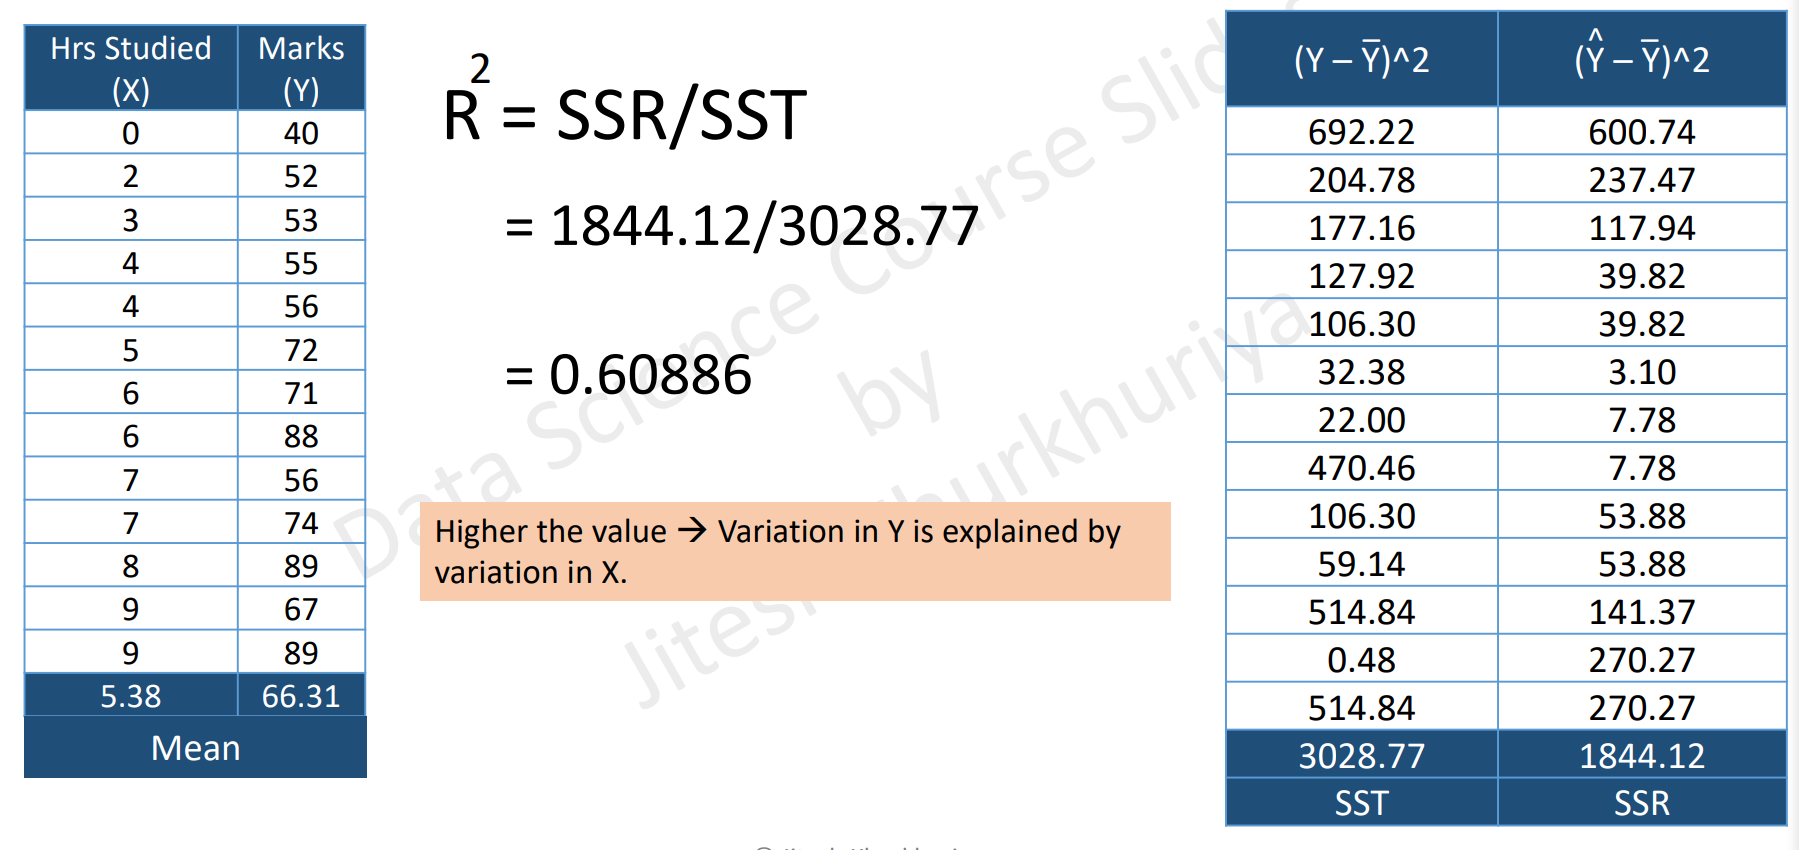
</div>


In [8]:
# Calculate R squared 
score = model.score(x_test,y_test)

In [9]:
score

0.8445283770796626

In [10]:
model.coef_

array([[5.02709483]])

In [11]:
model.intercept_

array([34.27245359])

In [12]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
import math

mse = mean_squared_error(pred,y_test)
rmse = math.sqrt(mse)

mse,rmse

(52.253820523250226, 7.228680413688949)

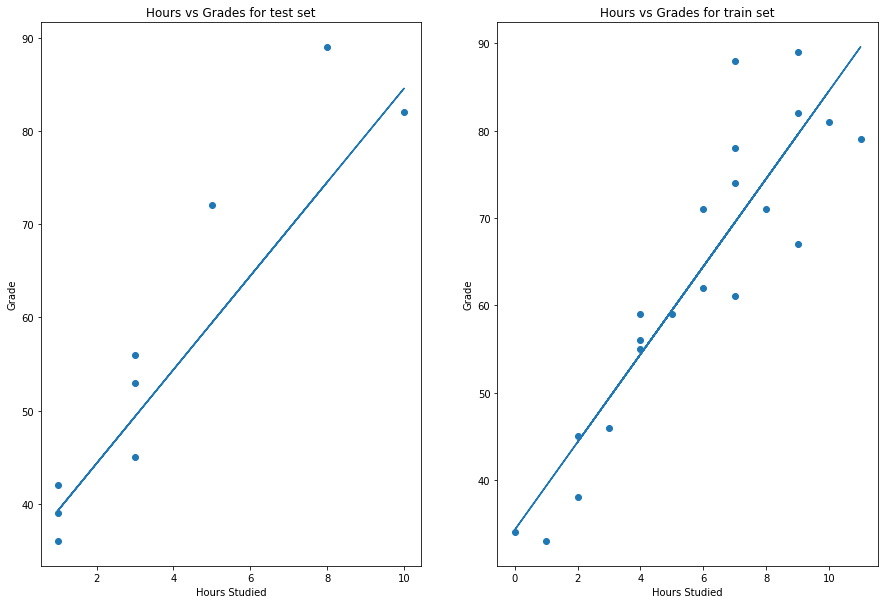

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title("Hours vs Grades for test set")
plt.xlabel("Hours Studied")
plt.ylabel("Grade")

plt.scatter(x_test,y_test)
plt.plot(x_test,pred)

plt.subplot(1,2,2)
plt.title("Hours vs Grades for train set")
plt.xlabel("Hours Studied")
plt.ylabel("Grade")
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train))

plt.show()

## Try random_state = 1 and random_state = 1234 to see how sampling affects the model results! 

We see that the variability in the test set is a lot higher when random_seed=1 as opposed to random_seed=1234